In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/jr13114/.conda/envs/acrg/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
clay1 = xr.open_dataset('/home/jr13114/Documents/soil_datasets/CLAY1.nc.part')
sand1 = xr.open_dataset('/home/jr13114/Documents/soil_datasets/SAND1.nc.part')

Porosity:

</b>0.332 - 7.251e-4 *(sf) + 0.1276* log10(cf) </b>

In [20]:
porosity1 = clay1.merge(sand1)

In [47]:
#truncating global dataset to Europe domain

porosity1 = porosity1.sel(lat=slice(80,30))
porosity1 = porosity1.sel(lon=slice(-12,30))

In [48]:
# clay and sand fractions of the soil

cf = porosity1.CLAY
sf = porosity1.SAND

In [49]:
#calculating porosity

porosity = 0.332 - 7.251e-4 * (sf) + 0.1276 * np.log10(cf) 

/home/jr13114/.conda/envs/acrg/lib/python3.7/site-packages/xarray/core/computation.py:609: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [50]:
#add porosity variable

porosity1 = porosity1.assign(POROSITY = porosity)

In [51]:
porosity1

<xarray.Dataset>
Dimensions:   (depth: 4, lat: 6000, lon: 5040)
Coordinates:
  * lon       (lon) float32 -11.9959 -11.987567 ... 29.987415 29.995749
  * lat       (lat) float32 79.99578 79.98744 79.97911 ... 30.012466 30.004131
  * depth     (depth) float32 4.5 9.1 16.6 28.9
Data variables:
    CLAY      (depth, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    SAND      (depth, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    POROSITY  (depth, lat, lon) float32 nan nan nan nan ... -inf -inf -inf -inf
Attributes:
    Conventions:  CF-1.0

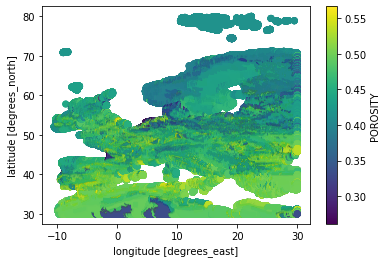

In [52]:
porosity1.sel(depth=4.5).plot.scatter('lon','lat','POROSITY')

In [39]:
clay2 = xr.open_dataset('/home/jr13114/Documents/soil_datasets/CLAY2.nc.part')
sand2 = xr.open_dataset('/home/jr13114/Documents/soil_datasets/SAND2.nc.part')
porosity2 = clay2.merge(sand2)

porosity2 = porosity2.sel(lat=slice(80,10))
porosity2 = porosity2.sel(lon=slice(-12,30))

cf2 = porosity2.CLAY
sf2 = porosity2.SAND

porro = 0.332 - 7.251e-4 * (sf2) + 0.1276 * np.log10(cf2) 

porosity2 = porosity2.assign(POROSITY = porro)